# Density & Distribution Functions

### Objective
The aim of this work is to investigate and compare the empirical and theoretical
probability density functions as well as cumulative distribution functions, with a focus on analyzing
their behavior relative to sample size variations.

## 1. Formulas of Theoretical Densities and Distribution Functions:

### Normal Distribution:
The probability density function (PDF) of a normal distribution with mean $\mu$ and standard deviation $\sigma$ is given by:
$$
f(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$

The cumulative distribution function (CDF) of a normal distribution is given by:
$$
F(x|\mu, \sigma) = \frac{1}{2} \left[1 + \text{erf}\left(\frac{x - \mu}{\sigma\sqrt{2}}\right)\right]
$$

### Uniform Distribution:
The probability density function (PDF) of a uniform distribution on the interval $[a, b]$ is given by:
$$
f(x|a, b) = \frac{1}{b - a} \quad \text{for } a \leq x \leq b
$$

The cumulative distribution function (CDF) of a uniform distribution on the interval $[a, b]$ is given by:
$$
F(x|a, b) = \frac{x - a}{b - a} \quad \text{for } a \leq x \leq b
$$

## 2. Theoretical and Sample Expectation and Standard Deviation:

### Normal Distribution:
- **Theoretical Expectation:** $EX = \mu$
- **Theoretical Standard Deviation:** $StdX = \sigma$

### Uniform Distribution:
- **Theoretical Expectation:** $EX = \frac{a + b}{2}$
- **Theoretical Standard Deviation:** $StdX = \frac{b - a}{\sqrt{12}}$

For sample data, the expectation and standard deviation are calculated using sample means and sample standard deviations.

## 3. Brief Conclusions:

- As the sample size increases, the empirical distribution functions tend to converge towards the theoretical distribution functions.
- The accuracy of empirical distribution functions and densities improves with increasing sample size, leading to closer alignment with theoretical counterparts.
- Larger sample sizes result in narrower confidence intervals and reduced variability in the estimates of parameters such as mean and standard deviation.
- Overall, increasing sample size enhances the consistency between empirical and theoretical distribution functions and provides more reliable estimates of population parameters.


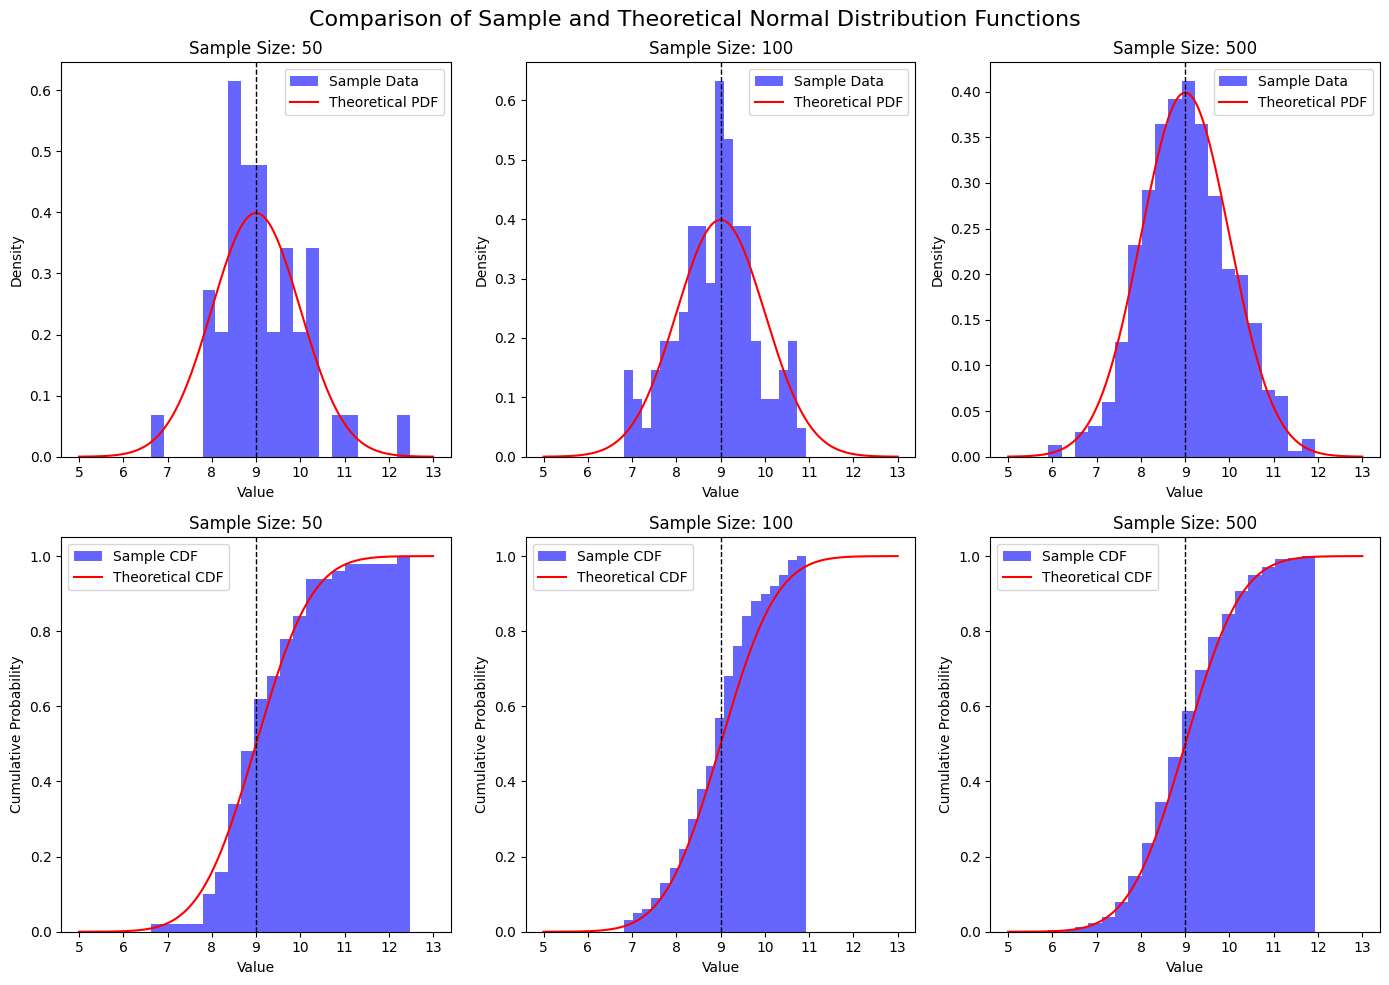

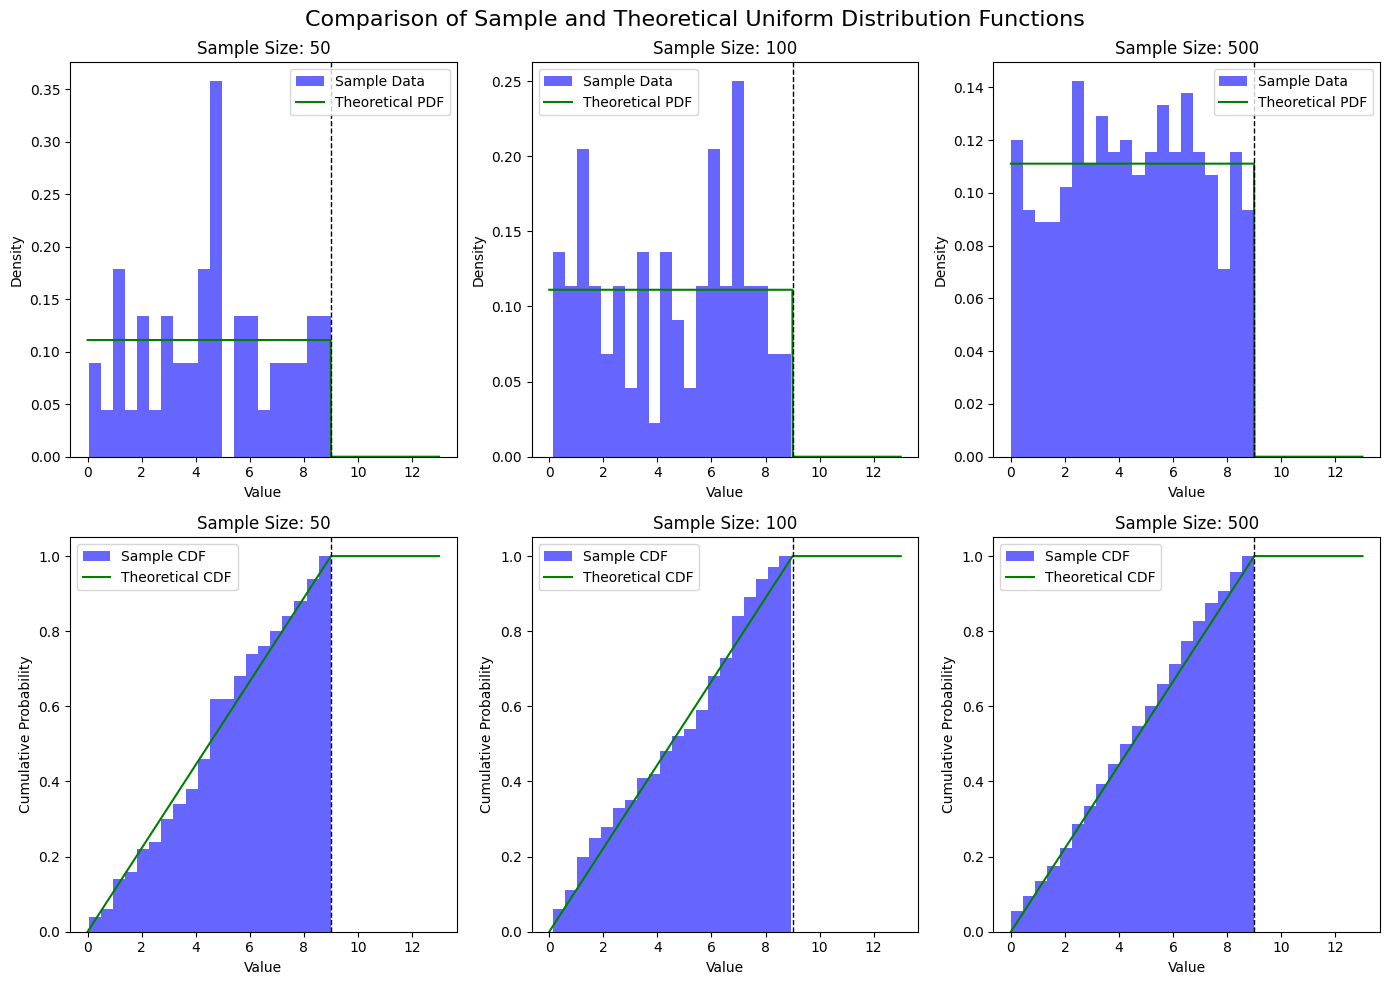

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

# Generating sample data sets
sample_sizes = [50, 100, 500]
mu, sigma = 9, 1  # parameters for normal distribution
a, b = 0, 9  # parameters for uniform distribution

# Generate sample data for normal distribution with different sample sizes
sample_data_normal = {size: np.random.normal(mu, sigma, size) for size in sample_sizes}

# Generate sample data for uniform distribution with different sample sizes
sample_data_uniform = {size: np.random.uniform(a, b, size) for size in sample_sizes}

# Comparing sample and theoretical functions
def compare_functions(sample_data, mu, sigma, a, b, distribution_name):
    # Create a new figure for the plots
    plt.figure(figsize=(14, 10))
    # Add a main title to the figure
    plt.suptitle(f'Comparison of Sample and Theoretical {distribution_name.capitalize()} Distribution Functions', fontsize=16)
    # Generate x values for plotting the theoretical distribution functions
    x = np.linspace(min(min([min(data) for data in sample_data.values()]), mu - 4*sigma),
                    max(max([max(data) for data in sample_data.values()]), mu + 4*sigma), 1000)

    # Iterate through each sample size
    for i, size in enumerate(sample_sizes):
        # Create subplots for PDF (Probability Density Function) comparison
        plt.subplot(2, len(sample_sizes), i + 1)
        # Plot histogram of sample data
        plt.hist(sample_data[size], bins=20, density=True, alpha=0.6, color='b', label='Sample Data')
        # Plot theoretical PDF
        if distribution_name == 'normal':
            plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label='Theoretical PDF')
        elif distribution_name == 'uniform':
            plt.plot(x, uniform.pdf(x, a, b - a), 'g-', label='Theoretical PDF')
        # Add title, x and y labels, mean line, and legend to the plot
        plt.title(f'Sample Size: {size}')
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.axvline(mu, color='k', linestyle='--', linewidth=1)  # Mean line
        plt.legend()

        # Create subplots for CDF (Cumulative Distribution Function) comparison
        plt.subplot(2, len(sample_sizes), len(sample_sizes) + i + 1)
        # Plot histogram of sample data with cumulative density
        plt.hist(sample_data[size], bins=20, density=True, alpha=0.6, color='b', cumulative=True, label='Sample CDF')
        # Plot theoretical CDF
        if distribution_name == 'normal':
            plt.plot(x, norm.cdf(x, mu, sigma), 'r-', label='Theoretical CDF')
        elif distribution_name == 'uniform':
            plt.plot(x, uniform.cdf(x, a, b - a), 'g-', label='Theoretical CDF')
        # Add title, x and y labels, mean line, and legend to the plot
        plt.title(f'Sample Size: {size}')
        plt.xlabel('Value')
        plt.ylabel('Cumulative Probability')
        plt.axvline(mu, color='k', linestyle='--', linewidth=1)  # Mean line
        plt.legend()
        
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

# Call the compare_functions function for normal distribution
compare_functions(sample_data_normal, mu, sigma, a, b, 'normal')

# Call the compare_functions function for uniform distribution
compare_functions(sample_data_uniform, mu, sigma, a, b, 'uniform')